<h1>HW6</h1>

# Question
### (Inverse Transform Sampling) Complete the following exercises 

### 1.1

Create a function to sample from a Gaussian distribution with mean $\mu$ and standard deviation $\sigma$:

* Function name: sample_gaussian

* Input: $\mu$, $\sigma$, n

* Output: a n-element vector of random sample from Gaussian~N($\mu$, $\sigma$)

* You are `not allowed` to use the Distributions.jl package or any existing sampler
* You are `allowed` to use SpecialFunctions.jl for special functions and rand for random number generation


An [example](https://stephens999.github.io/fiveMinuteStats/inverse_transform_sampling.html) of inverse transform sampling

In [2]:
import Pkg
Pkg.add(["SpecialFunctions", "Plots"])

   Resolving package versions...
  No Changes to `C:\Users\julia\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\julia\.julia\environments\v1.8\Manifest.toml`


In [3]:
import SpecialFunctions
import Plots

In [4]:
function sample_gaussian(μ,σ,n)
    # creating random Gaussian vector
    gaussian_rand=rand(n)
    # This is the quantile function of Gaussian distribution. It is the inverse of the CDF
    # It is outputting a random sample from the Gaussian by using the random vector previously generated
    inverse_cdf = μ .+ (σ .*sqrt(2) .* SpecialFunctions.erfinv.((2 .* gaussian_rand) .-1))
end

sample_gaussian (generic function with 1 method)

### 1.2


1. Use the sampler above to draw 10000 samples from a Gaussian distribution~N($\mu$ = -1, $\sigma$ = 2)
2. Plot the histogram of the 10000 samples 
3. Use the Distributions.jl package to obtain the pdf of the same Gaussian distribution~N($\mu$ = -1, $\sigma$ = 2) using x = -8:0.001:6
4. Plot the pdf on top of the histogram from step 2

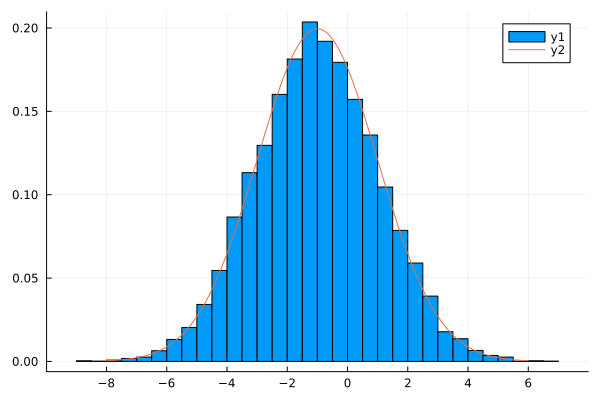

In [7]:
# Drawing 10,000 samples from Gaussian with mu = -1 and sigma=2
random_sampler= sample_gaussian(-1,2,10000)

import Distributions as di
using Distributions
using Plots

# plotting histogram of 10000 samples, normalize histogram
histogram(random_sampler, normalize=true)

# Using Distributions.jl package to get pdf of same Gaussian distribution
Gaussian=Normal(-1,2)

# Generate x range
x_dist=-8:0.001:6

# pdf of Gaussian distribution
pdf_val=pdf.(Gaussian,x_dist)

# plot pdf on top of histogram
plot!(x_dist,pdf_val)